In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [4]:
cancer=load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               stratify=cancer.target,
                                               random_state=0)

### 기본 Decision model

In [5]:
tree=DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
train_score=tree.score(x_train,y_train)
test_score=tree.score(x_test,y_test)

In [9]:
print("train accuracy : ",train_score)
print("test accuracy : ",test_score)

train accuracy :  1.0
test accuracy :  0.9020979020979021


## 가지치기

In [14]:
tree=DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [15]:
train_score=tree.score(x_train,y_train)
test_score=tree.score(x_test,y_test)

In [18]:
print('train : ',train_score)
print('test : ',test_score)

train :  0.9765258215962441
test :  0.916083916083916


In [25]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import graphviz
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family="Malgun Gothic")
plt.rcParams['axes.unicode_minus']=False

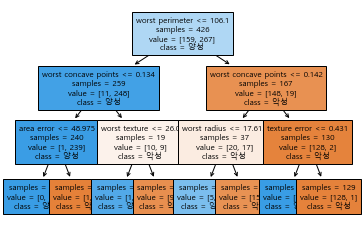

In [28]:
plot_tree(tree,class_names=['악성','양성'],
            feature_names=cancer.feature_names,
            impurity=False,filled=True,
            fontsize=8)
plt.show()

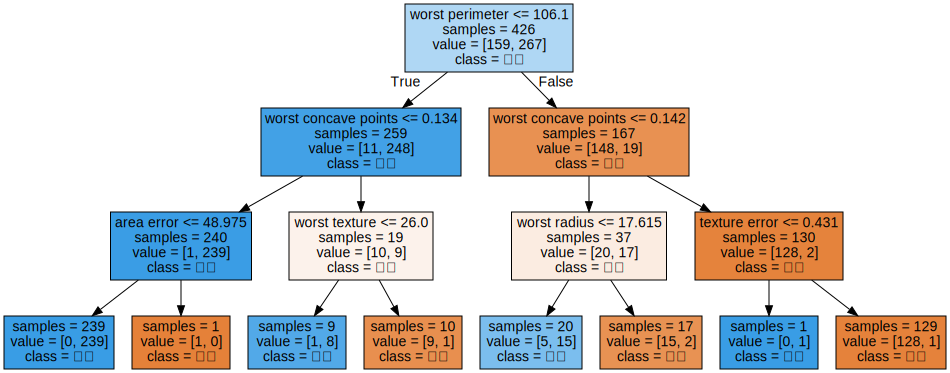

In [30]:
with open('tree.dot',encoding='utf-8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 특성중요도
- 특성중요도 : 0-1사이의 값 / 0 : 이 특성이 전혀 사용되지 않았다, 1: 완벽하게 정답값을 예측했다.
- 특성중요도의 전체 합 = 1

In [31]:
print("특성 중요도 : \n",tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


In [ ]:
import numpy as np
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)

### decision tree regressor

In [34]:
import os
import mglearn

In [44]:
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                    'ram_price.csv'))

del ram_prices['Unnamed: 0']

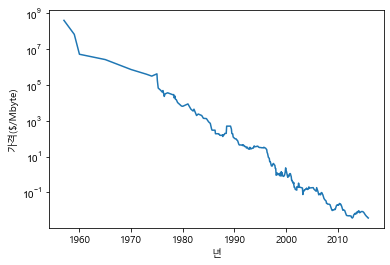

In [45]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")
plt.show()

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [47]:
#2000년 이전 데이터를 훈련데이터로, 2000년 이후 데이터를 테스트데이터로 사용
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

In [50]:
x_train=data_train.date.to_numpy()[:,np.newaxis]
y_train=np.log(data_train.price) #y=ln(x)
tree=DecisionTreeRegressor().fit(x_train,y_train)
linear_reg=LinearRegression().fit(x_train,y_train)

In [51]:
x_all=ram_prices.date.to_numpy()[:,np.newaxis]

In [52]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
linear_reg=LinearRegression().fit(x_train,y_train)

In [53]:
pred_tree=tree.predict(x_all)
pred_lr=linear_reg.predict(x_all)

In [55]:
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

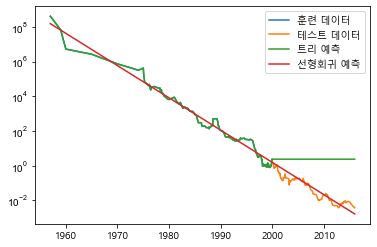

In [58]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date,data_train.price,label="훈련 데이터")
plt.semilogy(data_test.date,data_test.price,label="테스트 데이터")
plt.semilogy(ram_prices.date,price_tree,label="트리 예측")
plt.semilogy(ram_prices.date,price_lr,label="선형회귀 예측")
plt.legend()
plt.show()